#AI Knowledge Graph Builder for Enterprise Intelligence
##Module 1: Data Injection & Preprocessing

1.   Data Cleaning
2.   Data Validation
1.   Data Transformation
2.   Data Filtering
1.   Data Enrichment
2.   Data Deduplication
1.   Data Masking & Security
2.   Data Standardization
1.   Error Handling & Logging
2.   Metadata Handling
1.   Sampling (Optional)











##Data Preprocessing for Customer Support Dataset

In [1]:
'''
Install required libraries:
    1. Pandas
    2. Numpy
    3. Scikit-Learn
    4. nltk
    5. Matplotlib
    6. Seaborn
'''
!pip install pandas numpy scikit-learn nltk matplotlib seaborn

# Import after installation
import pandas as pd
import numpy as np

In [2]:
# Upload file(.csv) in Colab from the Computer
#from google.colab import files
#uploaded = files.upload()
# Select the CSV file from your computer

# Upload the file manually
df = pd.read_csv('/content/customer_support_tickets.csv')

#Showing the data in .csv file
df

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,NaN,Low,Phone,NaN,NaN,NaN
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Email,NaN,NaN,NaN
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0


### METHOD 1: DATA CLEANING
####Purpose: Remove bad data, fix missing values, remove duplicates

STEP 1: Perform & Display Basic Operation

In [3]:
# To check the Number of rows and Column present in the Data sheet by using 'shape function'
df.shape

#OR
print(f"Total rows: {len(df)}")
print(f"Total columns: {len(df.columns)}")

Total rows: 8469
Total columns: 17


In [4]:
# View the first 5 entries from the datasets
print("Five Entries from Beginning: ")
print("=" * 80)

df.head(5)

Five Entries from Beginning: 


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [5]:
# View the last 5 entries from the datasets
print("Five Entries from Ending:")
print("=" * 80)

df.tail(5)

Five Entries from Ending:


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,NaN,Low,Phone,NaN,NaN,NaN
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Email,NaN,NaN,NaN
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0
8468,8469,Steven Davis MD,lori20@example.net,53,Other,Philips Hue Lights,2020-06-01,Billing inquiry,Hardware issue,There seems to be a hardware problem with my {...,Open,NaN,High,Phone,NaN,NaN,NaN


In [6]:
# Information regarding datasets (Including Rows, Columns, Datatypes, Counts of sections)
print("Basic Information: ")
print("=" * 80)

df.info()
print()

#Print Datatypes
print(f"\nData types:\n{df.dtypes}")

Basic Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-nul

In [7]:
# Counting number of same values under each catergoies i.e Gender category (Male & females)
print(df['Customer Gender'].value_counts())      #Data for gender
print()
print("=" * 80)

print(df['Ticket Type'].value_counts())          #Data for Type of ticket
print()
print("=" * 80)

print(df['Ticket Status'].value_counts())        #Data for Status of ticket
print()
print("=" * 80)

print(df['Ticket Channel'].value_counts())       #Data for Channel of ticket
print()
print("=" * 80)

Customer Gender
Male      2896
Female    2887
Other     2686
Name: count, dtype: int64

Ticket Type
Refund request          1752
Technical issue         1747
Cancellation request    1695
Product inquiry         1641
Billing inquiry         1634
Name: count, dtype: int64

Ticket Status
Pending Customer Response    2881
Open                         2819
Closed                       2769
Name: count, dtype: int64

Ticket Channel
Email           2143
Phone           2132
Social media    2121
Chat            2073
Name: count, dtype: int64



STEP 2: Handle Missing Values

In [8]:
# To count the null or missingh values in the datasets under each COLUMN
print("Missing values count from each Column:")
print("=" * 80)

df.isna().sum()


Missing values count from each Column:


,0
Ticket ID,0
Customer Name,0
Customer Email,0
Customer Age,0
Customer Gender,0
Product Purchased,0
Date of Purchase,0
Ticket Type,0
Ticket Subject,0
Ticket Description,0


In [9]:
# To check any null value(missing value) present in datasets
# It shows boolean values as: true(as null value present) and false(as no null value is present)
df.isna()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,True
8465,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,True
8466,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8467,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
# Fill text columns with "Unknown"
text_columns = df.select_dtypes(include=['object']).columns
for col in text_columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna('Unknown')
        print(f"✓ Filled '{col}' with 'Unknown'")

# Fill numeric columns with median
numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)
        print(f"✓ Filled '{col}' with median: {median_val}")

✓ Filled 'Resolution' with 'Unknown'
✓ Filled 'First Response Time' with 'Unknown'
✓ Filled 'Time to Resolution' with 'Unknown'
✓ Filled 'Customer Satisfaction Rating' with median: 3.0


In [11]:
df

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,Unknown,Critical,Social media,2023-06-01 12:15:36,Unknown,3.0
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,Unknown,Critical,Chat,2023-06-01 16:45:38,Unknown,3.0
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,Unknown,Low,Phone,Unknown,Unknown,3.0
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,Unknown,Critical,Email,Unknown,Unknown,3.0
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0


STEP 3: Remove Duplicates

In [12]:
#Checking for duplicates values in the datasets
print("REMOVING DUPLICATE RECORDS:")
print("=" * 80)

duplicate_count = df.duplicated().sum()
print(f"Found {duplicate_count} duplicate rows")

df = df.drop_duplicates()
print(f"✓ Removed duplicates. New size: {len(df)} rows")


REMOVING DUPLICATE RECORDS:
Found 0 duplicate rows
✓ Removed duplicates. New size: 8469 rows


STEP 4: Standardize Column Names

In [13]:
# Rename the Column Names in Standard formats
print("STANDARDIZING COLUMN NAMES:")
print("=" * 80)

df.columns = df.columns.str.lower().str.replace(' ', '_')
print(f"✓ Standardized names:\n{list(df.columns)}")
print("=" * 80)

df

STANDARDIZING COLUMN NAMES:
✓ Standardized names:
['ticket_id', 'customer_name', 'customer_email', 'customer_age', 'customer_gender', 'product_purchased', 'date_of_purchase', 'ticket_type', 'ticket_subject', 'ticket_description', 'ticket_status', 'resolution', 'ticket_priority', 'ticket_channel', 'first_response_time', 'time_to_resolution', 'customer_satisfaction_rating']


,ticket_id,customer_name,customer_email,customer_age,customer_gender,product_purchased,date_of_purchase,ticket_type,ticket_subject,ticket_description,ticket_status,resolution,ticket_priority,ticket_channel,first_response_time,time_to_resolution,customer_satisfaction_rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,Unknown,Critical,Social media,2023-06-01 12:15:36,Unknown,3.0
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,Unknown,Critical,Chat,2023-06-01 16:45:38,Unknown,3.0
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,Unknown,Low,Phone,Unknown,Unknown,3.0
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,Unknown,Critical,Email,Unknown,Unknown,3.0
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0


STEP 5: Remove Invalid Values

In [14]:
# Removing Invalid Values
print("REMOVING INVALID VALUES: ")
print("=" * 80)

if 'customer_age' in df.columns:
    initial = len(df)
    df = df[df['customer_age'] >= 18]
    print(f"✓ Removed {initial - len(df)} rows with age < 18")

df = df.dropna(how='all')
print(f"✓ Removed completely empty rows")

REMOVING INVALID VALUES: 
✓ Removed 0 rows with age < 18
✓ Removed completely empty rows


#### Saving the Cleaned Data after applying the Data Cleaning Method

In [15]:
# Concluded:
print("DATA CLEANING COMPLETE")
print(f"Final size: {len(df)} rows × {len(df.columns)} columns")
print("=" * 80)

# Save to CSV in Google Drive
df.to_csv('01_cleaned_data.csv', index=False)
print("✓ Saved: 01_cleaned_data.csv")


DATA CLEANING COMPLETE
Final size: 8469 rows × 17 columns
✓ Saved: 01_cleaned_data.csv


### METHOD 2: DATA VALIDATION

STEP 1: Check Data Types

In [16]:
# Upload Load cleaned data
df = pd.read_csv('01_cleaned_data.csv')

# Check Data Types in the cleaned data sheet
print("VALIDATING DATA TYPES:")
print("=" * 80)

print("\nCurrent data types:")
print(df.dtypes)

VALIDATING DATA TYPES:

Current data types:
ticket_id                         int64
customer_name                    object
customer_email                   object
customer_age                      int64
customer_gender                  object
product_purchased                object
date_of_purchase                 object
ticket_type                      object
ticket_subject                   object
ticket_description               object
ticket_status                    object
resolution                       object
ticket_priority                  object
ticket_channel                   object
first_response_time              object
time_to_resolution               object
customer_satisfaction_rating    float64
dtype: object


STEP 2: Range Checks

In [17]:
# Checking the range of the age group of Customers

print("CHECKING VALUE RANGES:")
print("=" * 80)

if 'customer_age' in df.columns:
    min_age = df['customer_age'].min()
    max_age = df['customer_age'].max()
    valid_age = ((df['customer_age'] >= 18) & (df['customer_age'] <= 100)).all()
    status = "✓ VALID" if valid_age else "✗ INVALID"
    print(f"{status}: Age range [{min_age}, {max_age}] (expected 18-100)")


CHECKING VALUE RANGES:
✓ VALID: Age range [18, 70] (expected 18-100)


STEP 3: Mandatory Field Checks

In [18]:
# Checking the Mandatory Field
print("CHECKING MANDATORY FIELDS")
print("=" * 80)

mandatory_fields = ['customer_age', 'ticket_status', 'ticket_priority']
for field in mandatory_fields:
    if field in df.columns:
        empty = df[field].isnull().sum()
        status = "✓ VALID" if empty == 0 else "✗ INVALID"
        print(f"{status}: '{field}' - {empty} empty values")

CHECKING MANDATORY FIELDS
✓ VALID: 'customer_age' - 0 empty values
✓ VALID: 'ticket_status' - 0 empty values
✓ VALID: 'ticket_priority' - 0 empty values


STEP 4: Unique ID Check

In [19]:
# Checking for the Unique ID
print("CHECKING UNIQUE IDENTIFIERS:")
print("=" * 80)

if 'ticket_id' in df.columns:
    total = len(df)
    unique = df['ticket_id'].nunique()
    is_unique = (total == unique)
    status = "✓ VALID" if is_unique else "✗ INVALID"
    print(f"{status}: {unique} unique out of {total} records")

CHECKING UNIQUE IDENTIFIERS:
✓ VALID: 8469 unique out of 8469 records


STEP 5: Statistical Summary

In [20]:
# Summaries/Describing the full datasets into the various factors like Max. Min. Values, Standard values etc.
print("STATISTICAL SUMMARY:")
print("=" * 80)

print("\nNumeric columns summary:")
print(df.describe())


STATISTICAL SUMMARY:

Numeric columns summary:
         ticket_id  customer_age  customer_satisfaction_rating
count  8469.000000   8469.000000                   8469.000000
mean   4235.000000     44.026804                      2.997166
std    2444.934048     15.296112                      0.804446
min       1.000000     18.000000                      1.000000
25%    2118.000000     31.000000                      3.000000
50%    4235.000000     44.000000                      3.000000
75%    6352.000000     57.000000                      3.000000
max    8469.000000     70.000000                      5.000000


####Saving the Validated Data after applying the Data Validation Method

In [21]:
# Concluded:
print("VALIDATION COMPLETE:")
print(f"Final size: {len(df)} rows × {len(df.columns)} columns")
print("=" * 80)

# Save to CSV in Google Drive
df.to_csv('02_validated_data.csv', index=False)
print("✓ Saved: 02_validated_data.csv")

VALIDATION COMPLETE:
Final size: 8469 rows × 17 columns
✓ Saved: 02_validated_data.csv


###METHOD 3: DATA TRANSFORMATION

STEP 1: Data Type Conversion

In [22]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from datetime import datetime

# Upload Load validated data
df = pd.read_csv('02_validated_data.csv')

# Check Data Types in the validated data sheet
print("\nCurrent data types:")
print(df.dtypes)
print("=" * 80)

# Converting the Datatypes
print("CONVERTING DATA TYPES:")

if 'ticket_status' in df.columns:
    df['ticket_status'] = df['ticket_status'].astype('category')
    print(f"✓ Converted ticket_status to category")

if 'customer_age' in df.columns:
    df['customer_age'] = df['customer_age'].astype('int32')
    print(f"✓ Converted customer_age to int32")

print("=" * 80)
# Data Types after changing
print("\nCurrent data types:")
print(df.dtypes)



Current data types:
ticket_id                         int64
customer_name                    object
customer_email                   object
customer_age                      int64
customer_gender                  object
product_purchased                object
date_of_purchase                 object
ticket_type                      object
ticket_subject                   object
ticket_description               object
ticket_status                    object
resolution                       object
ticket_priority                  object
ticket_channel                   object
first_response_time              object
time_to_resolution               object
customer_satisfaction_rating    float64
dtype: object
CONVERTING DATA TYPES:
✓ Converted ticket_status to category
✓ Converted customer_age to int32

Current data types:
ticket_id                          int64
customer_name                     object
customer_email                    object
customer_age                       int32
custo

STEP 2: DateTime Parsing

In [23]:
# DateTime Parsing :
# converting a string of text that represents a date and/or time into a structured, machine-readable format
print("PARSING DATE COLUMNS:")
print("=" * 80)

date_columns = ['date_of_purchase', 'first_response_time', 'time_to_resolution']
for col in date_columns:
    if col in df.columns and df[col].dtype == 'object':
        df[col] = pd.to_datetime(df[col], errors='coerce')
        print(f"✓ Converted '{col}' to datetime")

PARSING DATE COLUMNS:
✓ Converted 'date_of_purchase' to datetime
✓ Converted 'first_response_time' to datetime
✓ Converted 'time_to_resolution' to datetime


/tmp/ipython-input-2244845520.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')


In [24]:
df

,ticket_id,customer_name,customer_email,customer_age,customer_gender,product_purchased,date_of_purchase,ticket_type,ticket_subject,ticket_description,ticket_status,resolution,ticket_priority,ticket_channel,first_response_time,time_to_resolution,customer_satisfaction_rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,Unknown,Critical,Social media,2023-06-01 12:15:36,NaT,3.0
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,Unknown,Critical,Chat,2023-06-01 16:45:38,NaT,3.0
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,Unknown,Low,Phone,NaT,NaT,3.0
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,Unknown,Critical,Email,NaT,NaT,3.0
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0


STEP 3: CREATING NEW FEATURES

In [25]:
print("CREATING NEW FEATURES")
print("=" * 80)

if 'date_of_purchase' in df.columns:
    df['purchase_year'] = df['date_of_purchase'].dt.year
    df['purchase_month'] = df['date_of_purchase'].dt.month
    df['purchase_day'] = df['date_of_purchase'].dt.day
    print(f"✓ Extracted year, month, day from date_of_purchase")

CREATING NEW FEATURES
✓ Extracted year, month, day from date_of_purchase


In [26]:
df

,ticket_id,customer_name,customer_email,customer_age,customer_gender,product_purchased,date_of_purchase,ticket_type,ticket_subject,ticket_description,ticket_status,resolution,ticket_priority,ticket_channel,first_response_time,time_to_resolution,customer_satisfaction_rating,purchase_year,purchase_month,purchase_day
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,Unknown,Critical,Social media,2023-06-01 12:15:36,NaT,3.0,2021,3,22
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,Unknown,Critical,Chat,2023-06-01 16:45:38,NaT,3.0,2021,5,22
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,2020,7,14
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,2020,11,13
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,2020,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,Unknown,Low,Phone,NaT,NaT,3.0,2021,12,8
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,Unknown,Critical,Email,NaT,NaT,3.0,2020,2,22
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0,2021,8,17
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0,2021,10,16


STEP 4: Encoding Categorical Data

In [27]:
print("ENCODING CATEGORICAL COLUMNS")
print("=" * 80)

categorical_cols = df.select_dtypes(include=['object']).columns
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col + '_encoded'] = le.fit_transform(df[col].astype(str))
    encoders[col] = le
    print(f"✓ Encoded '{col}'")

ENCODING CATEGORICAL COLUMNS
✓ Encoded 'customer_name'
✓ Encoded 'customer_email'
✓ Encoded 'customer_gender'
✓ Encoded 'product_purchased'
✓ Encoded 'ticket_type'
✓ Encoded 'ticket_subject'
✓ Encoded 'ticket_description'
✓ Encoded 'resolution'
✓ Encoded 'ticket_priority'
✓ Encoded 'ticket_channel'


In [28]:
df

,ticket_id,customer_name,customer_email,customer_age,customer_gender,product_purchased,date_of_purchase,ticket_type,ticket_subject,ticket_description,...,customer_name_encoded,customer_email_encoded,customer_gender_encoded,product_purchased_encoded,ticket_type_encoded,ticket_subject_encoded,ticket_description_encoded,resolution_encoded,ticket_priority_encoded,ticket_channel_encoded
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,...,5058,1084,2,16,4,13,3369,2573,0,3
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,...,3526,1334,0,21,4,10,2004,2573,0,0
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,...,1510,2580,2,10,4,8,189,343,2,3
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,...,1400,741,0,25,0,0,1971,2549,2,3
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,...,103,740,0,5,0,3,636,2658,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,...,1983,34,0,20,2,7,7399,2573,2,2
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,...,4890,6501,0,7,4,14,660,2573,0,1
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,...,5605,458,0,15,4,0,5687,666,1,3
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,...,7240,2363,1,33,2,9,4274,2645,3,1


STEP 5: Normalization

In [29]:
print("NORMALIZING NUMERIC COLUMNS:")
print("=" * 80)

if 'customer_age' in df.columns:
    scaler = MinMaxScaler()
    df['customer_age_normalized'] = scaler.fit_transform(df[['customer_age']])
    print(f"✓ Normalized customer_age to 0-1 range")
    print(f"  Range: [{df['customer_age_normalized'].min():.2f}, {df['customer_age_normalized'].max():.2f}]")


NORMALIZING NUMERIC COLUMNS:
✓ Normalized customer_age to 0-1 range
  Range: [0.00, 1.00]


In [30]:
df

,ticket_id,customer_name,customer_email,customer_age,customer_gender,product_purchased,date_of_purchase,ticket_type,ticket_subject,ticket_description,...,customer_email_encoded,customer_gender_encoded,product_purchased_encoded,ticket_type_encoded,ticket_subject_encoded,ticket_description_encoded,resolution_encoded,ticket_priority_encoded,ticket_channel_encoded,customer_age_normalized
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,...,1084,2,16,4,13,3369,2573,0,3,0.269231
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,...,1334,0,21,4,10,2004,2573,0,0,0.461538
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,...,2580,2,10,4,8,189,343,2,3,0.576923
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,...,741,0,25,0,0,1971,2549,2,3,0.173077
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,...,740,0,5,0,3,636,2658,2,1,0.942308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,...,34,0,20,2,7,7399,2573,2,2,0.076923
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,...,6501,0,7,4,14,660,2573,0,1,0.173077
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,...,458,0,15,4,0,5687,666,1,3,0.750000
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,...,2363,1,33,2,9,4274,2645,3,1,0.692308


####Saving the Transformed Data after applying the Data Transformation Method

In [31]:
# Concluded:
print("TRANSFORMATION COMPLETE")
print(f"Final size: {len(df)} rows × {len(df.columns)} columns")
print("=" * 80)

# Save to CSV in Google Drive
df.to_csv('03_transformed_data.csv', index=False)
print("✓ Saved: 03_transformed_data.csv")


TRANSFORMATION COMPLETE
Final size: 8469 rows × 31 columns
✓ Saved: 03_transformed_data.csv


### METHOD 4: DATA FILTERING

STEP 1: Remove Unnecessary Columns

In [32]:
# Upload Load Transformed data
df = pd.read_csv('03_transformed_data.csv')

# Check Data Types in the validated data sheet
print("\nCurrent data types:")
print(df.dtypes)
print("=" * 80)

#Remove Unnecessary Columns
print("STEP 1: REMOVING UNNECESSARY COLUMNS")
print("=" * 80)

columns_to_remove = ['customer_name', 'customer_email']
for col in columns_to_remove:
    if col in df.columns:
        df = df.drop(columns=[col])
        print(f"✓ Removed: '{col}'")

# Remove original text columns that we encoded
text_cols = df.select_dtypes(include=['object']).columns
for col in text_cols:
    if col + '_encoded' in df.columns:
        df = df.drop(columns=[col])
        print(f"✓ Removed: '{col}' (using encoded version)")


Current data types:
ticket_id                         int64
customer_name                    object
customer_email                   object
customer_age                      int64
customer_gender                  object
product_purchased                object
date_of_purchase                 object
ticket_type                      object
ticket_subject                   object
ticket_description               object
ticket_status                    object
resolution                       object
ticket_priority                  object
ticket_channel                   object
first_response_time              object
time_to_resolution               object
customer_satisfaction_rating    float64
purchase_year                     int64
purchase_month                    int64
purchase_day                      int64
customer_name_encoded             int64
customer_email_encoded            int64
customer_gender_encoded           int64
product_purchased_encoded         int64
ticket_type_encoded

In [33]:
df

,ticket_id,customer_age,date_of_purchase,ticket_status,first_response_time,time_to_resolution,customer_satisfaction_rating,purchase_year,purchase_month,purchase_day,...,customer_email_encoded,customer_gender_encoded,product_purchased_encoded,ticket_type_encoded,ticket_subject_encoded,ticket_description_encoded,resolution_encoded,ticket_priority_encoded,ticket_channel_encoded,customer_age_normalized
0,1,32,2021-03-22,Pending Customer Response,2023-06-01 12:15:36,NaN,3.0,2021,3,22,...,1084,2,16,4,13,3369,2573,0,3,0.269231
1,2,42,2021-05-22,Pending Customer Response,2023-06-01 16:45:38,NaN,3.0,2021,5,22,...,1334,0,21,4,10,2004,2573,0,0,0.461538
2,3,48,2020-07-14,Closed,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,2020,7,14,...,2580,2,10,4,8,189,343,2,3,0.576923
3,4,27,2020-11-13,Closed,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,2020,11,13,...,741,0,25,0,0,1971,2549,2,3,0.173077
4,5,67,2020-02-04,Closed,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,2020,2,4,...,740,0,5,0,3,636,2658,2,1,0.942308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,22,2021-12-08,Open,NaN,NaN,3.0,2021,12,8,...,34,0,20,2,7,7399,2573,2,2,0.076923
8465,8466,27,2020-02-22,Open,NaN,NaN,3.0,2020,2,22,...,6501,0,7,4,14,660,2573,0,1,0.173077
8466,8467,57,2021-08-17,Closed,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0,2021,8,17,...,458,0,15,4,0,5687,666,1,3,0.750000
8467,8468,54,2021-10-16,Closed,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0,2021,10,16,...,2363,1,33,2,9,4274,2645,3,1,0.692308


STEP 2: Filter Records by Condition

In [34]:
# Filter Records by applying Condition
print("FILTERING RECORDS:")
print("=" * 80)

if 'customer_satisfaction_rating' in df.columns:
    df = df.dropna(subset=['customer_satisfaction_rating'])
    print(f"✓ Filtered out unresolved tickets")

if 'purchase_year' in df.columns:
    recent_year = df['purchase_year'].max() - 2
    df = df[df['purchase_year'] >= recent_year]
    print(f"✓ Kept only recent data (year >= {recent_year})")

FILTERING RECORDS:
✓ Filtered out unresolved tickets
✓ Kept only recent data (year >= 2019)


In [35]:
df

,ticket_id,customer_age,date_of_purchase,ticket_status,first_response_time,time_to_resolution,customer_satisfaction_rating,purchase_year,purchase_month,purchase_day,...,customer_email_encoded,customer_gender_encoded,product_purchased_encoded,ticket_type_encoded,ticket_subject_encoded,ticket_description_encoded,resolution_encoded,ticket_priority_encoded,ticket_channel_encoded,customer_age_normalized
0,1,32,2021-03-22,Pending Customer Response,2023-06-01 12:15:36,NaN,3.0,2021,3,22,...,1084,2,16,4,13,3369,2573,0,3,0.269231
1,2,42,2021-05-22,Pending Customer Response,2023-06-01 16:45:38,NaN,3.0,2021,5,22,...,1334,0,21,4,10,2004,2573,0,0,0.461538
2,3,48,2020-07-14,Closed,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,2020,7,14,...,2580,2,10,4,8,189,343,2,3,0.576923
3,4,27,2020-11-13,Closed,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,2020,11,13,...,741,0,25,0,0,1971,2549,2,3,0.173077
4,5,67,2020-02-04,Closed,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,2020,2,4,...,740,0,5,0,3,636,2658,2,1,0.942308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,22,2021-12-08,Open,NaN,NaN,3.0,2021,12,8,...,34,0,20,2,7,7399,2573,2,2,0.076923
8465,8466,27,2020-02-22,Open,NaN,NaN,3.0,2020,2,22,...,6501,0,7,4,14,660,2573,0,1,0.173077
8466,8467,57,2021-08-17,Closed,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0,2021,8,17,...,458,0,15,4,0,5687,666,1,3,0.750000
8467,8468,54,2021-10-16,Closed,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0,2021,10,16,...,2363,1,33,2,9,4274,2645,3,1,0.692308


STEP 3: Remove Incomplete Records

In [36]:
# Remove Incomplete Records form the datasets
print("FILTERING INCOMPLETE RECORDS:")
print("=" * 80)

initial = len(df)
critical_fields = ['customer_age', 'ticket_status', 'ticket_priority']
df = df.dropna(subset=[col for col in critical_fields if col in df.columns])
print(f"✓ Removed {initial - len(df)} rows with missing critical fields")

print(f"\nAfter: {len(df)} rows × {len(df.columns)} columns")

FILTERING INCOMPLETE RECORDS:
✓ Removed 0 rows with missing critical fields

After: 8469 rows × 21 columns


####Saving the Filtered Data after applying the Data Filtration Method

In [37]:
# Concluded:
print("DATA FILTERING COMPLETE")
print(f"Final size: {len(df)} rows × {len(df.columns)} columns")
print("=" * 80)

# Save to CSV in Google Drive
df.to_csv('04_filtered_data.csv', index=False)
print("✓ Saved: 04_filtered_data.csv")


DATA FILTERING COMPLETE
Final size: 8469 rows × 21 columns
✓ Saved: 04_filtered_data.csv


###METHOD 5: DATA ENRICHMENT

STEP 1: Create Derived Fields

In [38]:
# Upload Load Filtered data
df = pd.read_csv('04_filtered_data.csv')

# Create Derived Fields
print("CREATING DERIVED FIELDS:")
print("=" * 80)

def categorize_age(age):
    """Categorize age into groups"""
    if age < 30:
        return 'Young'
    elif age < 50:
        return 'Middle-aged'
    else:
        return 'Senior'

if 'customer_age' in df.columns:
    df['age_group'] = df['customer_age'].apply(categorize_age)
    print("✓ Created age_group field")
    print(f"  Categories: {df['age_group'].unique()}")

CREATING DERIVED FIELDS:
✓ Created age_group field
  Categories: ['Middle-aged' 'Young' 'Senior']


In [39]:
df

,ticket_id,customer_age,date_of_purchase,ticket_status,first_response_time,time_to_resolution,customer_satisfaction_rating,purchase_year,purchase_month,purchase_day,...,customer_gender_encoded,product_purchased_encoded,ticket_type_encoded,ticket_subject_encoded,ticket_description_encoded,resolution_encoded,ticket_priority_encoded,ticket_channel_encoded,customer_age_normalized,age_group
0,1,32,2021-03-22,Pending Customer Response,2023-06-01 12:15:36,NaN,3.0,2021,3,22,...,2,16,4,13,3369,2573,0,3,0.269231,Middle-aged
1,2,42,2021-05-22,Pending Customer Response,2023-06-01 16:45:38,NaN,3.0,2021,5,22,...,0,21,4,10,2004,2573,0,0,0.461538,Middle-aged
2,3,48,2020-07-14,Closed,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,2020,7,14,...,2,10,4,8,189,343,2,3,0.576923,Middle-aged
3,4,27,2020-11-13,Closed,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,2020,11,13,...,0,25,0,0,1971,2549,2,3,0.173077,Young
4,5,67,2020-02-04,Closed,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,2020,2,4,...,0,5,0,3,636,2658,2,1,0.942308,Senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,22,2021-12-08,Open,NaN,NaN,3.0,2021,12,8,...,0,20,2,7,7399,2573,2,2,0.076923,Young
8465,8466,27,2020-02-22,Open,NaN,NaN,3.0,2020,2,22,...,0,7,4,14,660,2573,0,1,0.173077,Young
8466,8467,57,2021-08-17,Closed,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0,2021,8,17,...,0,15,4,0,5687,666,1,3,0.750000,Senior
8467,8468,54,2021-10-16,Closed,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0,2021,10,16,...,1,33,2,9,4274,2645,3,1,0.692308,Senior


/tmp/ipython-input-303167825.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


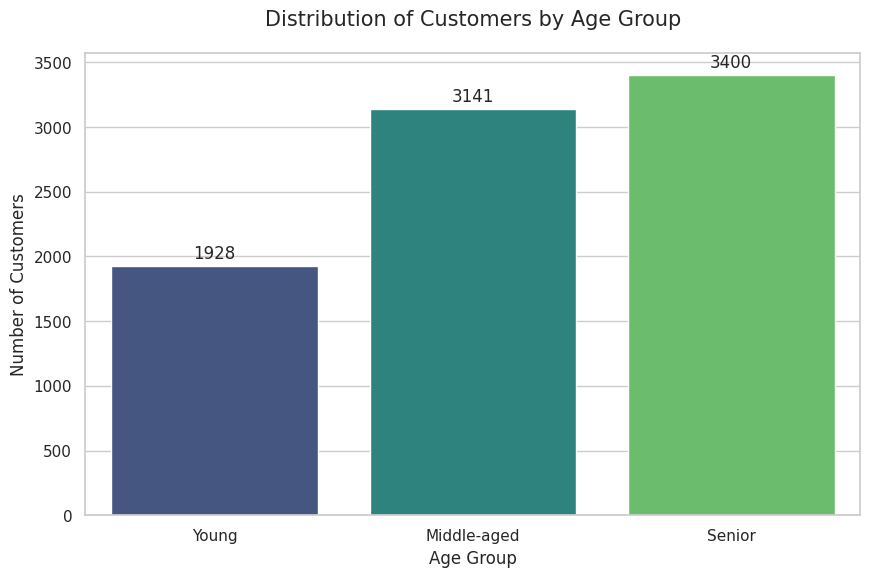

In [40]:
#Visual Representation of the data
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Set the visual style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# 2. Define the desired order for the categories
age_order = ['Young', 'Middle-aged', 'Senior']

# 3. Create the countplot
ax = sns.countplot(
    data=df,
    x='age_group',
    order=age_order,
    palette='viridis'
)

# 4. Add labels and title for clarity
plt.title('Distribution of Customers by Age Group', fontsize=15, pad=20)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# 5. Add data labels on top of each bar (optional but helpful)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()



STEP 2: Lookup-Based Enrichment

In [41]:
print("ADDING REFERENCE DATA:")
print("=" * 80)

priority_mapping = {
    'low': 1,
    'medium': 2,
    'high': 3,
    'critical': 4
}

print("✓ Created priority mapping reference")

ADDING REFERENCE DATA:
✓ Created priority mapping reference


STEP 4: Interaction Features

In [42]:
print("CREATING INTERACTION FEATURES:")
print("=" * 80)

if 'customer_age' in df.columns and 'customer_satisfaction_rating' in df.columns:
    df['customer_value_score'] = (df['customer_age'] * df['customer_satisfaction_rating']) / 100
    print("✓ Created customer_value_score")


CREATING INTERACTION FEATURES:
✓ Created customer_value_score


STEP 5: Time-Based Features

In [43]:
print("EXTRACTING TIME FEATURES:")
print("=" * 80)

if 'purchase_month' in df.columns:
    def get_season(month):
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        else:
            return 'Fall'

    df['season'] = df['purchase_month'].apply(get_season)
    print("✓ Created season field")

EXTRACTING TIME FEATURES:
✓ Created season field


In [44]:
df

,ticket_id,customer_age,date_of_purchase,ticket_status,first_response_time,time_to_resolution,customer_satisfaction_rating,purchase_year,purchase_month,purchase_day,...,ticket_type_encoded,ticket_subject_encoded,ticket_description_encoded,resolution_encoded,ticket_priority_encoded,ticket_channel_encoded,customer_age_normalized,age_group,customer_value_score,season
0,1,32,2021-03-22,Pending Customer Response,2023-06-01 12:15:36,NaN,3.0,2021,3,22,...,4,13,3369,2573,0,3,0.269231,Middle-aged,0.96,Spring
1,2,42,2021-05-22,Pending Customer Response,2023-06-01 16:45:38,NaN,3.0,2021,5,22,...,4,10,2004,2573,0,0,0.461538,Middle-aged,1.26,Spring
2,3,48,2020-07-14,Closed,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,2020,7,14,...,4,8,189,343,2,3,0.576923,Middle-aged,1.44,Summer
3,4,27,2020-11-13,Closed,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,2020,11,13,...,0,0,1971,2549,2,3,0.173077,Young,0.81,Fall
4,5,67,2020-02-04,Closed,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,2020,2,4,...,0,3,636,2658,2,1,0.942308,Senior,0.67,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,22,2021-12-08,Open,NaN,NaN,3.0,2021,12,8,...,2,7,7399,2573,2,2,0.076923,Young,0.66,Winter
8465,8466,27,2020-02-22,Open,NaN,NaN,3.0,2020,2,22,...,4,14,660,2573,0,1,0.173077,Young,0.81,Winter
8466,8467,57,2021-08-17,Closed,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0,2021,8,17,...,4,0,5687,666,1,3,0.750000,Senior,1.71,Summer
8467,8468,54,2021-10-16,Closed,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0,2021,10,16,...,2,9,4274,2645,3,1,0.692308,Senior,1.62,Fall


####Saving the Enriched Data after applying the Data Enrichment Method

In [45]:
# Concluded:
print("DATA ENRICHMENT COMPLETE")
print(f"Final size: {len(df)} rows × {len(df.columns)} columns")
print("=" * 80)

# Save to CSV in Google Drive
df.to_csv('05_enriched_data.csv', index=False)
print("✓ Saved: 05_enriched_data.csv")

DATA ENRICHMENT COMPLETE
Final size: 8469 rows × 24 columns
✓ Saved: 05_enriched_data.csv


In [46]:
df

,ticket_id,customer_age,date_of_purchase,ticket_status,first_response_time,time_to_resolution,customer_satisfaction_rating,purchase_year,purchase_month,purchase_day,...,ticket_type_encoded,ticket_subject_encoded,ticket_description_encoded,resolution_encoded,ticket_priority_encoded,ticket_channel_encoded,customer_age_normalized,age_group,customer_value_score,season
0,1,32,2021-03-22,Pending Customer Response,2023-06-01 12:15:36,NaN,3.0,2021,3,22,...,4,13,3369,2573,0,3,0.269231,Middle-aged,0.96,Spring
1,2,42,2021-05-22,Pending Customer Response,2023-06-01 16:45:38,NaN,3.0,2021,5,22,...,4,10,2004,2573,0,0,0.461538,Middle-aged,1.26,Spring
2,3,48,2020-07-14,Closed,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,2020,7,14,...,4,8,189,343,2,3,0.576923,Middle-aged,1.44,Summer
3,4,27,2020-11-13,Closed,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,2020,11,13,...,0,0,1971,2549,2,3,0.173077,Young,0.81,Fall
4,5,67,2020-02-04,Closed,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,2020,2,4,...,0,3,636,2658,2,1,0.942308,Senior,0.67,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,22,2021-12-08,Open,NaN,NaN,3.0,2021,12,8,...,2,7,7399,2573,2,2,0.076923,Young,0.66,Winter
8465,8466,27,2020-02-22,Open,NaN,NaN,3.0,2020,2,22,...,4,14,660,2573,0,1,0.173077,Young,0.81,Winter
8466,8467,57,2021-08-17,Closed,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0,2021,8,17,...,4,0,5687,666,1,3,0.750000,Senior,1.71,Summer
8467,8468,54,2021-10-16,Closed,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0,2021,10,16,...,2,9,4274,2645,3,1,0.692308,Senior,1.62,Fall
